# Example of using the Borehole3D class

### Imports

In [1]:
import matplotlib.pyplot as plt
from striplog import Component, Decor, Legend, Interval, Position
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from core.core import Project
from utils.orm import get_interval_list

### Define the components and the way to display them

In [2]:
components = [Component({'lithology': 'siltstone', 'colour': 'grey'}),
              Component({'lithology': 'anhydrite'}),
              Component({'lithology': 'sandstone', 'grainsize': 'vf-f', 'colour': 'grey'}),
              Component({'lithology': 'dolomite'}),
              Component({'lithology': 'siltstone', 'colour': 'red'}),
              Component({'lithology': 'limestone'})]
list_of_decors=[]
hatches = ['=', 'x', '.', 's', '=', 'b']
colours = ['#888888', '#882222', '#AAAAAA', '#CC22CC', '#CC2222', '#2222CC']
for i in range(len(components)):
    d = {'color': colours[i],
         'hatch': hatches[i],
         'component': components[i],
         'width': 3}
    decor = Decor(d)
    list_of_decors.append(decor)
legend = Legend(list_of_decors)

## Get the interval list

In [3]:
engine = create_engine('sqlite:///tmp/test_orm_db.db', echo=True)

In [4]:
Session = sessionmaker(bind=engine)
session = Session()

### Create the Borehole 3D object using the legend

In [5]:
p = Project(session)

2020-12-18 18:55:37,595 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-12-18 18:55:37,599 INFO sqlalchemy.engine.base.Engine ()
2020-12-18 18:55:37,602 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-12-18 18:55:37,603 INFO sqlalchemy.engine.base.Engine ()
2020-12-18 18:55:37,604 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-12-18 18:55:37,609 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id" 
FROM "Boreholes"
2020-12-18 18:55:37,610 INFO sqlalchemy.engine.base.Engine ()


In [6]:
interval_list = get_interval_list(p.boreholes[0])

2020-12-18 18:55:37,634 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2020-12-18 18:55:37,638 INFO sqlalchemy.engine.base.Engine ('F01',)
2020-12-18 18:55:37,651 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2020-12-18 18:55:37,654 INFO sqlalchemy.engine.base.Engine (0,)
2020-12-18 18:55:37,662 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Posit

2020-12-18 18:55:37,829 INFO sqlalchemy.engine.base.Engine (19,)
2020-12-18 18:55:37,834 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2020-12-18 18:55:37,836 INFO sqlalchemy.engine.base.Engine (20,)
2020-12-18 18:55:37,839 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2020-12-18 18:55:37,841 INFO sqlalchemy.engine.base.Engine (21,)
2020-12-18 18:55:37,844 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positi

2020-12-18 18:55:38,019 INFO sqlalchemy.engine.base.Engine (40,)
2020-12-18 18:55:38,033 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2020-12-18 18:55:38,036 INFO sqlalchemy.engine.base.Engine (41,)
2020-12-18 18:55:38,042 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2020-12-18 18:55:38,051 INFO sqlalchemy.engine.base.Engine (42,)
2020-12-18 18:55:38,065 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positi

In [7]:
bh3d = Borehole3D(interval_list, legend=legend)

Borehole geometry created successfully !


### Display the striplog

<AxesSubplot:>

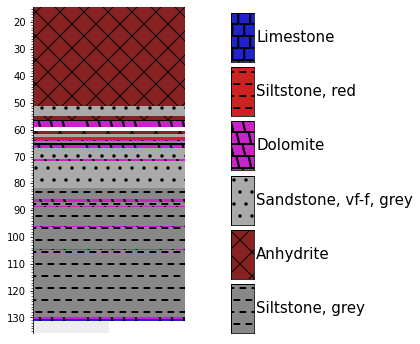

In [8]:
fix, ax = plt.subplots(ncols=2, figsize=(6,6))
bh3d.plot(legend=legend, ax=ax[0])
bh3d.legend.plot(ax=ax[1])

### Display the borehole in 3D using the legend

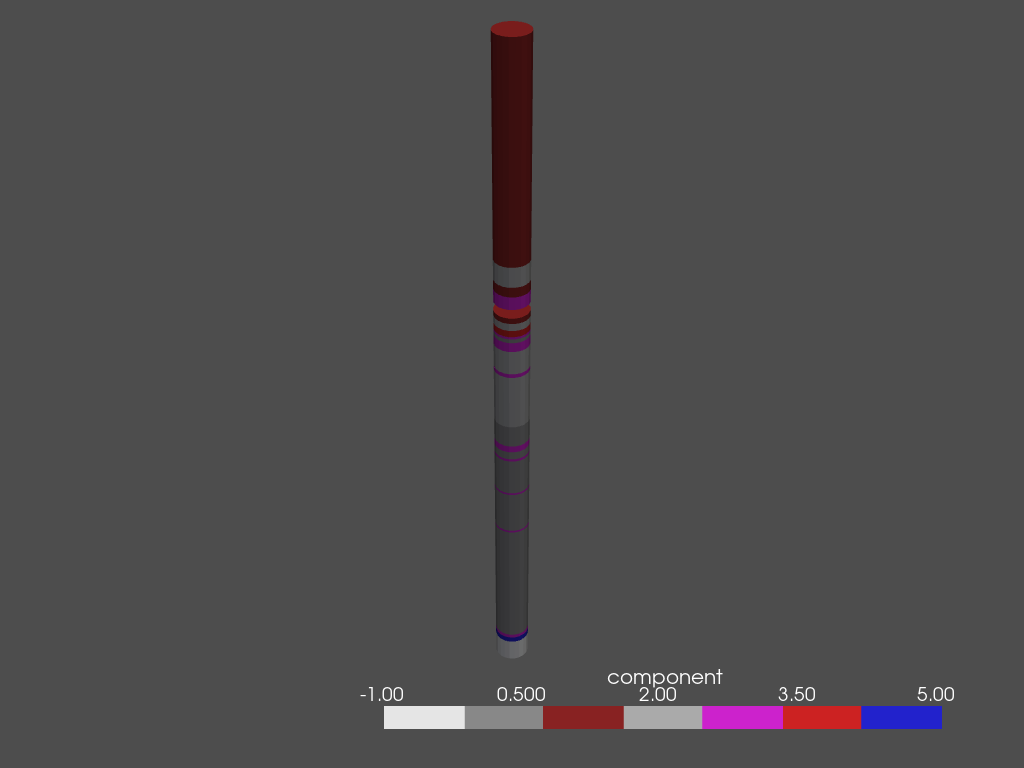

In [9]:
bh3d.plot3d()

### The Borehole in 3D using X3D for interaction within the notebook

In [10]:
bh3d.plot3d(x3d=True)